## The softmax function

A multiclass classification DNN model outputs a set of numbers, one for each output unit. In a classification task the number of these outputs corresponds to the number of classes. 

Observing the outputs per se makes it difficult to evaluate the quality of a solution. It would be preferable if these outputs could be interpreted as the probability of an input belonging to each of the classes.

This implies that:

1. all outputs must be positive
2. the sum of all outputs must be one

Regarding 1. there are a few ways to achieve this, for instance taking the square of the element, taking an absolute value, or exponentiate them. From the mentioned options, both the squared root and absolute value are not feasible as for each output obtained there will always be 2 possible input values. 

On the other hand, the $exp$ function maps from the entire $Z$ line to $Z^+$ and its invertible.

To make the sum of all outputs sum to $1$, all that is required is a normalization. this can be achieved by dividing each element by the sum of all elements.

The softmax function:

$ \large f(o_i) = \Large \frac{\Large e^{in_i}}{\sum_j e^{in_j}}$

This function is commonly used in the output neurons of the network.

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np

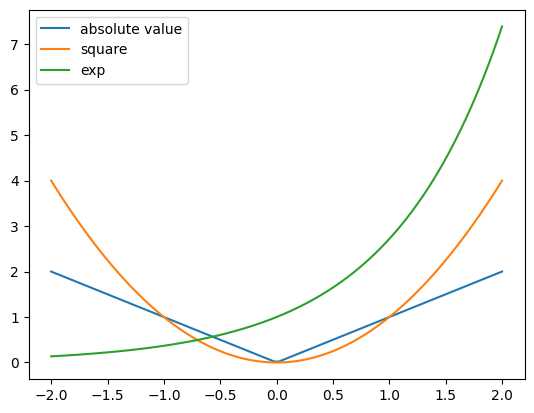

In [2]:
xx = np.linspace(-2, 2, 100)

a = [abs(x) for x in xx]
s = [x*x for x in xx]
e = [math.exp(x) for x in xx]

plt.plot(xx,a, label='absolute value')
plt.plot(xx,s, label='square')
plt.plot(xx,e, label='exp')
plt.legend()

Consider the follwoing output of a DNN model (without activation function):
 
$\begin{cases} x_0 = -3.0 \\ x_1 = 2.73 \\ x_2 = 0.15 \\ \end{cases}$

The softmax output will be:

$\begin{cases} y_0 = 0.00300928 \\ y_1 = 0.92676595 \\ y_2 = 0.07022477 \\ \end{cases}$

In [3]:
input = np.asarray([-3.0, 2.73, 0.15])
np.exp(input)/np.sum(np.exp(input))

array([0.00300928, 0.92676595, 0.07022477])

Ploting the result for softmax as $x_1$ and $x_2$ remain constant, and $x_0$ in the range from $-3$ to $7$

In [4]:

input = np.asarray([-3.0, 2.73, 0.15])
res=[[],[],[]]

for k in range(100):
    res[0].append(np.exp(input[0])/np.sum(np.exp(input)))
    res[1].append(np.exp(input[1])/np.sum(np.exp(input)))
    res[2].append(np.exp(input[2])/np.sum(np.exp(input)))
    
    input[0] += 1.0/10.0

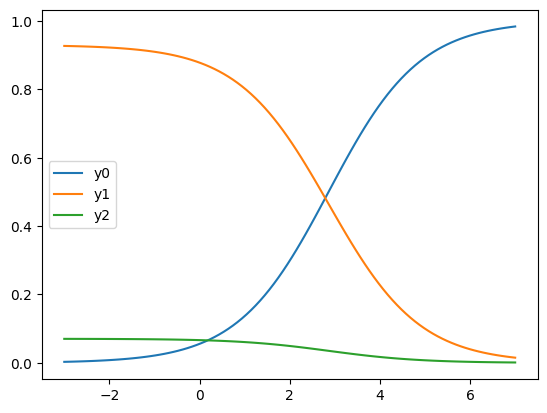

In [5]:
xx = xx = np.linspace(-3, 7, 100)
plt.plot(xx,res[0], label="y0")
plt.plot(xx,res[1], label="y1")
plt.plot(xx,res[2], label="y2")
plt.legend(loc="center left")

### Why is it called softmax?

Consider that the outputs are scaled by $100$. The previous plot for $y_0$ would be:

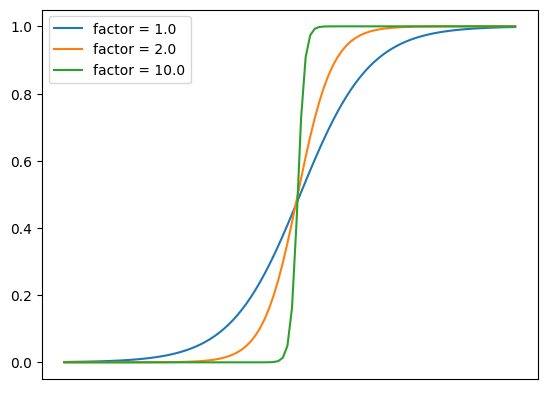

In [6]:
xx = np.linspace(-4, 9, 100)
input = np.asarray([-3.0, 2.73, 0.15])

inp = 0
factor = [1.0, 2.0, 10.0]

sm = [[],[],[]]

for k in xx:
    input[inp] = k
    for i,f in enumerate(factor):
        sm[i].append(np.exp(input[inp] * f)/(np.sum(np.exp(input * f) + 0.000001)))


for i,f in enumerate(factor):
    plt.plot(xx,sm[i], label = f'factor = {f}')

ax = plt.gca()

#hide x-axis
ax.get_xaxis().set_visible(False)
plt.legend()    


As seen in the above graph, when the input is large, the softmax approximates the max function. I.e, when the output of $y_0$ crosses the output of $y_1$ (the highest of the remaining outputs) it quickly changes from 0 to 1. Hence the maximum output rapidly converge be 1, even though its difference from some other output might be very small. In this sense it is a max function, the winner takes it all.

For smaller values the softmax is a "softer" version of max, hence the name.